In [ ]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])  


import_or_install('rasterio')
import_or_install('fiona')
import_or_install('geopandas')
import_or_install('pandas')
import geopandas as gpd
import pandas as pd
import glob
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint
import rasterio.mask
import fiona
import os
from google.colab import files
import numpy as np
import rasterio
from matplotlib import pyplot
from rasterio.plot import show


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Fiona-1.8.21-cp37-cp37m-manylinux2014_x86_64.whl (16.7 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
NumExpr defaulting to 2 threads.


In [ ]:
#global variables 

#path to folder
path= "/content/"

#GCP coordinates
x1=163920
y1=368700
x2=165370
y2=367450

#setting GCPs
tl = GroundControlPoint(0, 0, x1, y1)
bl = GroundControlPoint(1634, 0, x1, y2)
br = GroundControlPoint(1634, 1900, x2, y2)
tr = GroundControlPoint(0, 1900, x2, y1)
gcps = [tl, bl, br, tr]

#transform to GTIFF
transform = from_gcps(gcps)
crs = 'epsg:28992'

In [ ]:
###FOR ARRAYS IN CSV FORMAT FROM MACHINE LEARNING OUTPUT
#this part reads all csv files and writes them to rasters. it also georeferences them


for filename in os.listdir(path):
    if filename.endswith("csv"):
      df=pd.read_csv(filename, sep=',')
      df.fillna(0, inplace=True)
      print(df.head(100),df.shape)

      filename=filename.replace('prediction_', '')
      filename=filename.replace('.csv','')

      outputname = rasterio.open(filename+ '.tif', 'w', driver='GTiff',
                            height = df.shape[0], width = df.shape[1],
                            count=1, dtype= rasterio.uint8,
                            crs=crs,
                            transform=transform)

      outputname.write(df, 1)
      outputname.close()

for filename in os.listdir(path):
    if filename.endswith("tif"):
      files.download(filename)



    Unnamed: 0    0    1    2    3    4    5    6    7    8  ...  1889  1890  \
0            0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1            1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2            2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3            3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4            4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
..         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
95          95  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
96          96  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
97          97  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
98          98  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
99          99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

    1891  1892  1893  1894  1895  1896 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#check the shape of all rasters 
for filename in os.listdir(path):
    if filename.endswith(".npy"):
      DL_array=np.load(filename, allow_pickle=True)
      print(DL_array.shape)

(1634, 1899, 1)
(1634, 1899, 1)
(1634, 1899, 1)


In [ ]:
######FOR ARRAYS IN NPY FORMAT FROM DEEPLEARNING OUTPUT######
#reads all .npy files in the folder, converts them to rasters and georeferences them
for filename in os.listdir(path):
    if filename.endswith(".npy"):
      DL_array=np.load(filename, allow_pickle=True)
      DL_array = DL_array[:, :, 0]
      DL_array.shape
      df= pd.DataFrame(DL_array)

      filename=filename.replace('.npy','')

      outputname = rasterio.open(filename+ '.tif', 'w', driver='GTiff',
                                  height = df.shape[0], width = df.shape[1],
                                  count=1, dtype= rasterio.uint8,
                                  crs=crs,
                                  transform=transform)

      outputname.write(df,1)
      outputname.close()

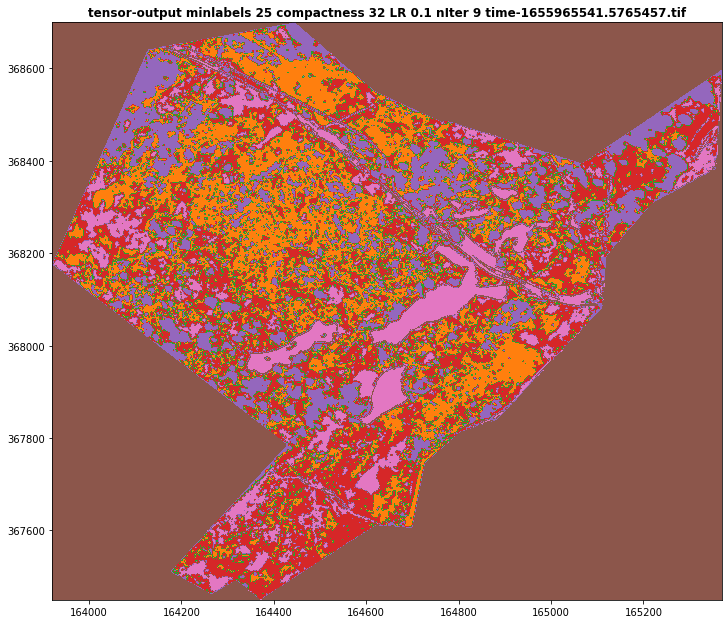

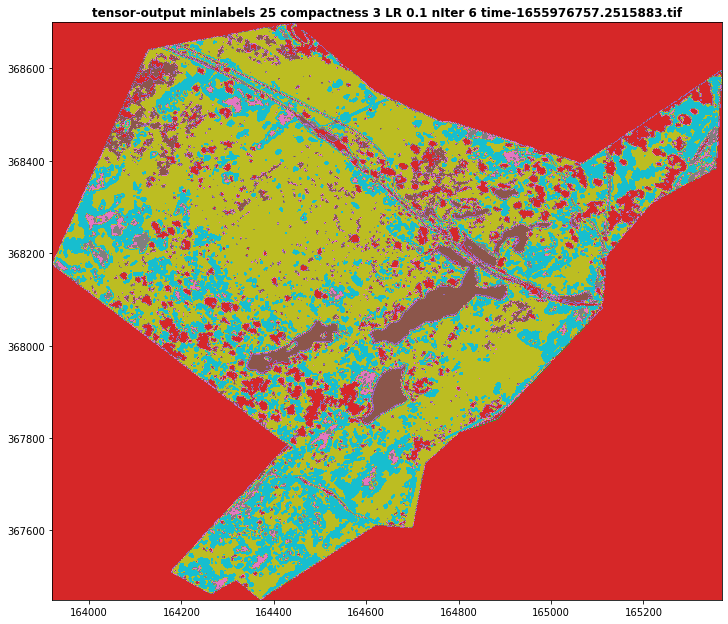

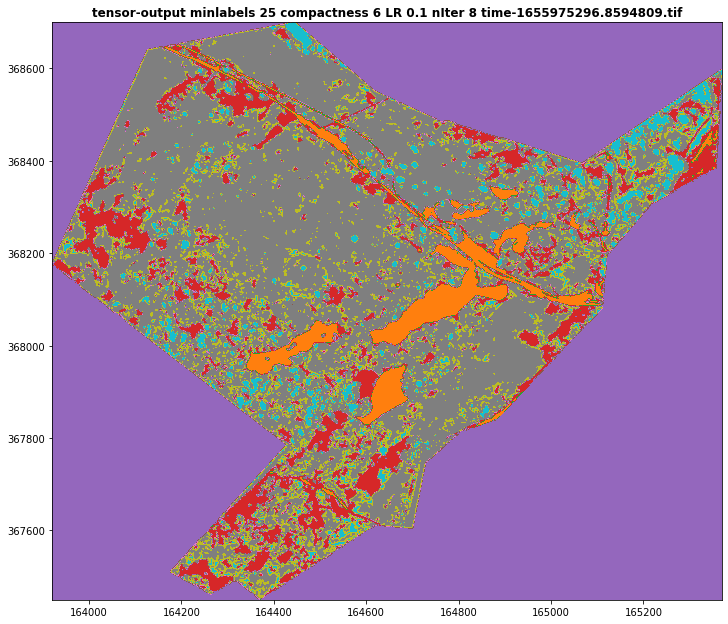

In [ ]:
#plot all tif files
for filename in os.listdir(path):
    if filename.endswith("tif"):
      output=rasterio.open(filename)
      fig, ax = pyplot.subplots(1, figsize=(12, 12))
      show(output,cmap='tab10', ax=ax, title=filename)

In [ ]:
######download all tif files######
for filename in os.listdir(path):
    if filename.endswith("tif"):
      files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>